In [1]:
import pandas as pd

KeyboardInterrupt: 

In [ ]:
df = pd.read_csv('final_cars.csv')

In [ ]:
df.head()

,full_name,registered_year,engine_capacity [cc],insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power [hp],seats,mileage [kmpl],body_type,city,resale_price [USD]
0,Maruti Baleno,2017,1197,Third Party,Manual,40000.0,First Owner,Petrol,80.0,5.0,22,Hatchback,Agra,6540.0
1,Tata Hexa,2018,2179,Third Party,Automatic,70000.0,First Owner,Diesel,150.0,7.0,18,MUV,Agra,12000.0
2,Maruti Swift,2015,1197,Third Party,Manual,70000.0,Second Owner,Petrol,80.0,5.0,20,Sedan,Agra,5400.0
3,Hyundai i10,2009,1086,Third Party,Manual,80000.0,First Owner,Petrol,60.0,5.0,20,Hatchback,Agra,1920.0
4,Hyundai i20,2015,1197,Third Party,Manual,70000.0,First Owner,Petrol,80.0,5.0,18,Hatchback,Agra,5640.0


In [ ]:
df.columns

Index(['full_name', 'registered_year', 'engine_capacity [cc]', 'insurance',
       'transmission_type', 'kms_driven', 'owner_type', 'fuel_type',
       'max_power [hp]', 'seats', 'mileage [kmpl]', 'body_type', 'city',
       'resale_price [USD]'],
      dtype='object')

In [ ]:
len(df)

15507

In [ ]:
df.dtypes

full_name                object
registered_year           int64
engine_capacity [cc]      int64
insurance                object
transmission_type        object
kms_driven              float64
owner_type               object
fuel_type                object
max_power [hp]          float64
seats                   float64
mileage [kmpl]            int64
body_type                object
city                     object
resale_price [USD]      float64
dtype: object

# Wydzielenie marki i modelu z jednej kolumny

In [ ]:
df[['mark','model']] = df['full_name'].str.split(' ',expand=True)

In [ ]:
df['mark'].unique()

array(['Maruti', 'Tata', 'Hyundai', 'Honda', 'Toyota', 'Kia', 'Ford',
       'Mitsubishi', 'Mahindra', 'Audi', 'Volkswagen', 'Skoda', 'MG',
       'Renault', 'Nissan', 'Chevrolet', 'Datsun', 'Jeep', 'BMW',
       'Mercedes-Benz', 'Fiat', 'Land', 'Jaguar', 'Volvo', 'Isuzu',
       'Mini', 'Citroen', 'Porsche', 'Lexus', 'Force', 'OpelCorsa',
       'Daewoo', 'Bentley'], dtype=object)

In [ ]:
df = df.drop(columns=['full_name','city'])

In [ ]:
last_two_columns = df.iloc[:, -2:]

data_without_last_two = df.iloc[:, :-2]

df = pd.concat([last_two_columns, data_without_last_two], axis=1)


df.head()

,mark,model,registered_year,engine_capacity [cc],insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power [hp],seats,mileage [kmpl],body_type,resale_price [USD]
0,Maruti,Baleno,2017,1197,Third Party,Manual,40000.0,First Owner,Petrol,80.0,5.0,22,Hatchback,6540.0
1,Tata,Hexa,2018,2179,Third Party,Automatic,70000.0,First Owner,Diesel,150.0,7.0,18,MUV,12000.0
2,Maruti,Swift,2015,1197,Third Party,Manual,70000.0,Second Owner,Petrol,80.0,5.0,20,Sedan,5400.0
3,Hyundai,i10,2009,1086,Third Party,Manual,80000.0,First Owner,Petrol,60.0,5.0,20,Hatchback,1920.0
4,Hyundai,i20,2015,1197,Third Party,Manual,70000.0,First Owner,Petrol,80.0,5.0,18,Hatchback,5640.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Przygotowanie danych kategorycznych

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['mark'] = label_encoder.fit_transform(df['mark'])
df['model'] = label_encoder.fit_transform(df['model'])
df['body_type'] = label_encoder.fit_transform(df['body_type'])

df['owner_type'].unique()
df['owner_type'] = df['owner_type'].replace({'First Owner':1, 'Second Owner':2, 'Third Owner':3, 'Fifth Owner':4,
       'Fourth Owner':5})

C:\Users\Lukasz\AppData\Local\Temp\ipykernel_18816\2627325459.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")


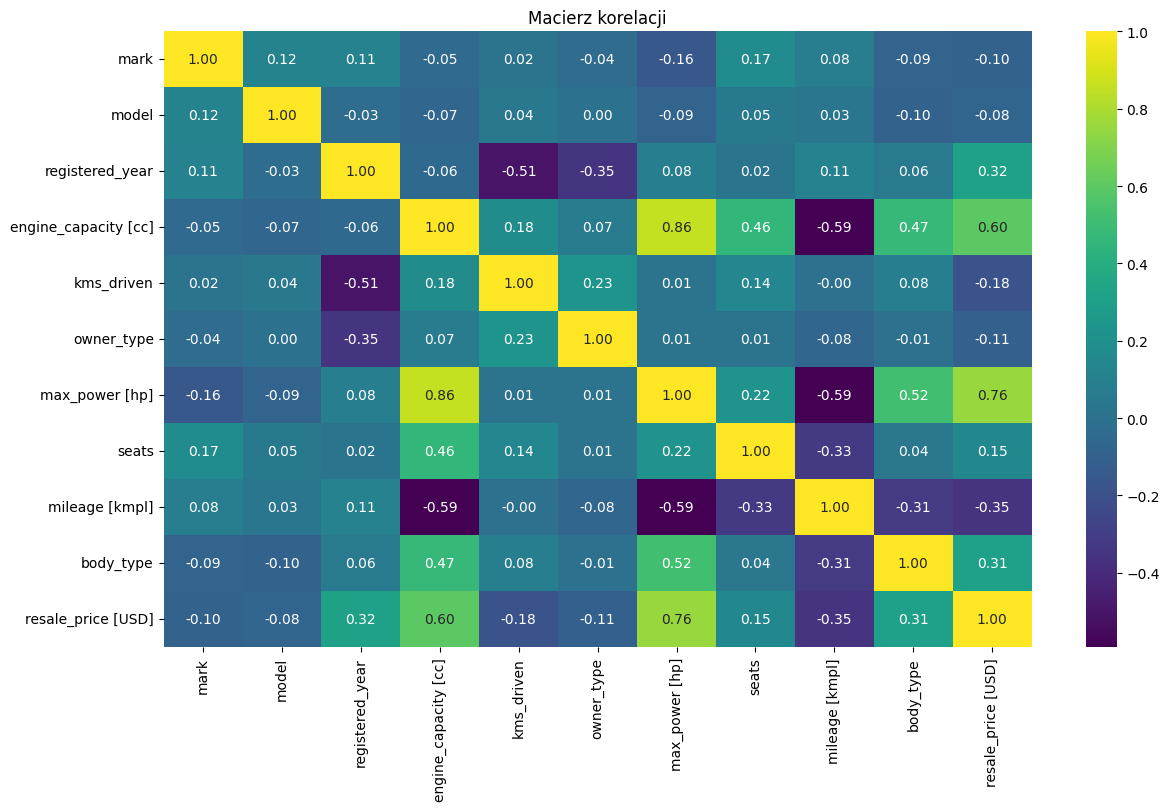

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Macierz korelacji')
plt.show()

# Przygotowanie danych kategorycznych 2

In [ ]:
categorical_columns = ['insurance', 'transmission_type', 'fuel_type']
categorical_encoded = pd.get_dummies(df[categorical_columns],drop_first=True)
df = df.drop(columns=categorical_columns)
df = pd.concat([df,categorical_encoded],axis=1)

In [ ]:
df.head()

,mark,model,registered_year,engine_capacity [cc],kms_driven,owner_type,max_power [hp],seats,mileage [kmpl],body_type,resale_price [USD],insurance_First,insurance_Second,insurance_Third Party,insurance_Zero Dep,transmission_type_Manual,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol
0,20,31,2017,1197,40000.0,1,80.0,5.0,22,2,6540.0,0,0,1,0,1,0,0,1
1,29,99,2018,2179,70000.0,1,150.0,7.0,18,3,12000.0,0,0,1,0,0,1,0,0
2,20,183,2015,1197,70000.0,2,80.0,5.0,20,7,5400.0,0,0,1,0,1,0,0,1
3,11,230,2009,1086,80000.0,1,60.0,5.0,20,2,1920.0,0,0,1,0,1,0,0,1
4,11,231,2015,1197,70000.0,1,80.0,5.0,18,2,5640.0,0,0,1,0,1,0,0,1


In [ ]:
X = df.drop(columns=['resale_price [USD]'])

y = df['resale_price [USD]']

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# 1 Proba stworzenia modeli bez skalowania wartosci:

In [ ]:
models = [LinearRegression(), RandomForestRegressor(),
          AdaBoostRegressor(), KNeighborsRegressor(), DecisionTreeRegressor(),
          Lasso()]
model_names = ["LinearRegression", "RandomForestRegressor", "AdaBoostRegressor",
               "KNeighborsRegressor", "DecisionTreeRegressor", "Lasso"]

In [ ]:
MSE = []
MAE = []
RMSE = []
R_squared = []
accuracy = []


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
for model, model_name in zip(models, model_names):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r_squared = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    R_squared.append(r_squared)
    MSE.append(mse)
    RMSE.append(rmse)
    MAE.append(mae)

model_report = pd.DataFrame({'Model Name': model_names,
                             'MSE': MSE,
                             'MAE': MAE,
                             'RMSE': RMSE,
                             'R-squared': R_squared})

model_report

,Model Name,MSE,MAE,RMSE,R-squared,Accuracy
0,LinearRegression,4.984303e+07,3679.619935,7059.959720,0.654885,65.488549
1,RandomForestRegressor,1.724716e+07,1408.944389,4152.969607,0.880580,88.058022
2,AdaBoostRegressor,7.142428e+07,5986.739811,8451.288581,0.505456,50.545634
3,KNeighborsRegressor,6.343055e+07,3787.497308,7964.329951,0.560805,56.080513
4,DecisionTreeRegressor,2.260598e+07,1778.550810,4754.574261,0.843476,84.347560
5,Lasso,4.983795e+07,3677.932553,7059.599838,0.654921,65.492067


# 2 Proba z przeskalowanymi wartosciami

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["engine_capacity [cc]"]] = scaler.fit_transform(df[["engine_capacity [cc]"]])
df[["kms_driven"]] = scaler.fit_transform(df[["kms_driven"]])
df[["mileage [kmpl]"]] = scaler.fit_transform(df[["mileage [kmpl]"]])
#df[["resale_price [USD]"]] = scaler.fit_transform(df[["resale_price [USD]"]])
df[["registered_year"]] = scaler.fit_transform(df[["registered_year"]])
df[["max_power [hp]"]] = scaler.fit_transform(df[["max_power [hp]"]])
df[["seats"]] = scaler.fit_transform(df[["seats"]])


In [ ]:
X = df.drop(columns=['resale_price [USD]'])

y = df['resale_price [USD]']

In [ ]:
models = [LinearRegression(), RandomForestRegressor(),
          AdaBoostRegressor(), KNeighborsRegressor(), DecisionTreeRegressor(),
          Lasso()]
model_names = ["LinearRegression", "RandomForestRegressor", "AdaBoostRegressor",
               "KNeighborsRegressor", "DecisionTreeRegressor", "Lasso"]

In [ ]:
MSE = []
MAE = []
RMSE = []
R_squared = []
accuracy = []


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
for model, model_name in zip(models, model_names):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r_squared = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    R_squared.append(r_squared)
    MSE.append(mse)
    RMSE.append(rmse)
    MAE.append(mae)

model_report = pd.DataFrame({'Model Name': model_names,
                             'MSE': MSE,
                             'MAE': MAE,
                             'RMSE': RMSE,
                             'R-squared': R_squared})

model_report

,Model Name,MSE,MAE,RMSE,R-squared,Accuracy
0,LinearRegression,4.984303e+07,3679.619935,7059.959720,0.654885,65.488549
1,RandomForestRegressor,1.711293e+07,1409.144650,4136.777725,0.881510,88.150961
2,AdaBoostRegressor,7.606797e+07,6613.762577,8721.695602,0.473303,47.330327
3,KNeighborsRegressor,3.929878e+07,1991.289975,6268.874177,0.727894,72.789415
4,DecisionTreeRegressor,2.219413e+07,1762.949907,4711.064371,0.846327,84.632725
5,Lasso,4.979655e+07,3672.612110,7056.667111,0.655207,65.520732


Patrzac na powyzsze wyniki wiekszosc modeli z przeskalowanymi wartosciami uzyskuja lepsze wyniki

# Kolejna proba bedzie zbudowanie modeli na danych przeskalowanych, pozostawiajac tylko te najbardziej wplywowe kolumny (bazujac na macierzy korelacji).

In [ ]:
X = df.drop(columns=['resale_price [USD]','mark','model','owner_type'])

y = df['resale_price [USD]']

In [ ]:
models = [LinearRegression(), RandomForestRegressor(),
          AdaBoostRegressor(), KNeighborsRegressor(), DecisionTreeRegressor(),
          Lasso()]
model_names = ["LinearRegression", "RandomForestRegressor", "AdaBoostRegressor",
               "KNeighborsRegressor", "DecisionTreeRegressor", "Lasso"]

In [ ]:
MSE = []
MAE = []
RMSE = []
R_squared = []
accuracy = []


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
for model, model_name in zip(models, model_names):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r_squared = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    R_squared.append(r_squared)
    MSE.append(mse)
    RMSE.append(rmse)
    MAE.append(mae)

model_report = pd.DataFrame({'Model Name': model_names,
                             'MSE': MSE,
                             'MAE': MAE,
                             'RMSE': RMSE,
                             'R-squared': R_squared})

model_report

,Model Name,MSE,MAE,RMSE,R-squared,Accuracy
0,LinearRegression,5.000823e+07,3683.220483,7071.649602,0.653742,65.374166
1,RandomForestRegressor,1.721033e+07,1545.889414,4148.533891,0.880835,88.083518
2,AdaBoostRegressor,5.652990e+07,4743.481448,7518.636758,0.608585,60.858544
3,KNeighborsRegressor,2.553155e+07,1912.855335,5052.875133,0.823219,82.321887
4,DecisionTreeRegressor,2.450895e+07,1957.570725,4950.651239,0.830299,83.029938
5,Lasso,4.995471e+07,3675.513970,7067.864750,0.654112,65.411221


Widzimy ze w niektorych modelach parametry ulegly poprawie. Patrzac jednak na konkretny model, widzimy ze RandomForestRegressor uzyskuje bardzo zblizone wyniki(nawet troche gorsze). Spróbujmy wiec na modelu tym (korzystajac jednak ze wszystkich kolumn) uzyc techniki GridSearchCV w celu znalezienia najbardziej optymalnych hiperparametrow.

In [ ]:
model = RandomForestRegressor()

# Uzycie GridSearchCV w celu znalezienia najbardziej optyalnych parametrow

In [ ]:
X = df.drop(columns=['resale_price [USD]'])

y = df['resale_price [USD]']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
param_grid = {
    "n_estimators" : [100,150,250],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model,param_grid)
grid.fit(X_train,y_train)
grid.best_params_

{'n_estimators': 250}

In [ ]:
MSE = []
MAE = []
RMSE = []
R_squared = []

In [ ]:
best_model = grid.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
R_squared.append(r_squared)
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)

model_report = pd.DataFrame({'Model Name': 'RandomForestRegressor',
                             'MSE': MSE,
                             'MAE': MAE,
                             'RMSE': RMSE,
                             'R-squared': R_squared})

model_report

,Model Name,MSE,MAE,RMSE,R-squared,Accuracy
0,RandomForestRegressor,1.577563e+07,1396.107726,3971.85445,0.890637,89.063688


Widzimy, że dany model uzyskuje dosłownie wszystkie parametry lepsze w porównaniu ze swoją poprzednią wersją (z przeskalowanymi wartościami i wszystkimi atrybutami) 

# Zapis modelu do pliku

In [ ]:
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)